#**Generación de imagenes de noticias**

Instalamos las librerias necesarias

In [ ]:
!pip install diffusers
!pip install transformers
!pip install torch
!pip install accelerate
!pip install opencv-contrib-python

In [ ]:
# Importamos las librerias necesarias.

from diffusers import StableDiffusionPipeline, StableDiffusionXLPipeline
from diffusers import AutoPipelineForText2Image
import matplotlib.pyplot as plt
import torch



In [ ]:
# Probaremos las imagenes generadas por diferentes versiones del modelo

model_id1 = "dreamlike-art/dreamlike-diffusion-1.0" #probado
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0" #prbado
model_id3 = "stabilityai/sdxl-turbo" #probado
model_id4 = "stabilityai/stable-diffusion-2-1" #probado
model_id5 = "CompVis/stable-diffusion-v1-4" #probado


In [ ]:
model_id = model_id5

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained(
    pretrained_model_or_path=model_id,
    torch_dtype=torch.float16,
    use_safetensors=True
) # safetensors es simplemente un formato en el que se ha guardado el modelo

# Si tenemos GPU alojamos ahi el modelo para acelerar la generacion:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.33.1",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Le proporcionamos un prompt en inglés generado a partir del título de la noticia.

In [ ]:
prompt = """
A dramatic political scene in the U.S. Senate chamber. Mitch McConnell stands firmly at a podium, refusing a Supreme Court hearing. Merrick Garland, in judge's robes, appears disappointed in the background. American flags, wood desks, and formal lighting complete the setting. Photorealistic style.
"""

In [ ]:
image = pipe(prompt=prompt, num_inference_steps=50)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
my_image = image.images[0]

## Prueba con modelo "CompVis/stable-diffusion-v1-4"

[PROMPT]:  
A dramatic political scene in the U.S. Senate chamber. Mitch McConnell stands firmly at a podium, refusing a Supreme Court hearing. Merrick Garland, in judge's robes, appears disappointed in the background. American flags, wood desks, and formal lighting complete the setting. Photorealistic style.



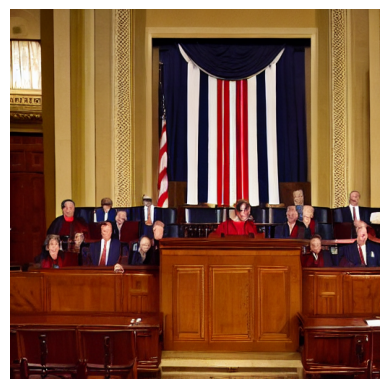

In [ ]:
print("[PROMPT]: ",prompt) # model_id5 = "CompVis/stable-diffusion-v1-4"
plt.imshow(my_image);
plt.axis('off');

## Prueba con modelo "dreamlike-art/dreamlike-diffusion-1.0"

[PROMPT]:  
A dramatic political scene in the U.S. Senate chamber. Mitch McConnell stands firmly at a podium, refusing a Supreme Court hearing. Merrick Garland, in judge's robes, appears disappointed in the background. American flags, wood desks, and formal lighting complete the setting. Photorealistic style.



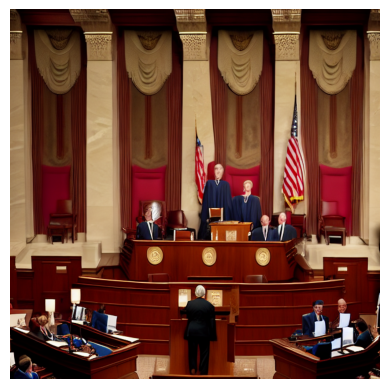

In [ ]:
print("[PROMPT]: ",prompt) # model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
plt.imshow(my_image);
plt.axis('off');

## Prueba con modelo "stabilityai/stable-diffusion-xl-base-1.0"

[PROMPT]:  
A dramatic political scene in the U.S. Senate chamber. Mitch McConnell stands firmly at a podium, refusing a Supreme Court hearing. Merrick Garland, in judge's robes, appears disappointed in the background. American flags, wood desks, and formal lighting complete the setting. Photorealistic style.



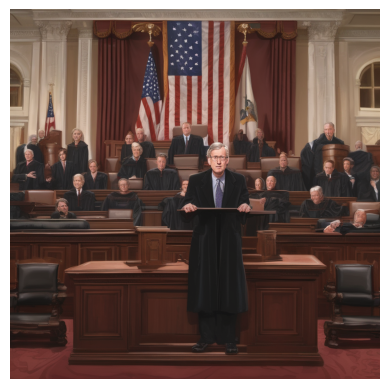

In [ ]:
print("[PROMPT]: ",prompt) ## model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"
plt.imshow(my_image);
plt.axis('off');